In [1]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
import nltk
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
from nltk.corpus import stopwords
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_score
import string
nltk.download('punkt')
from nltk.probability import FreqDist
from wordcloud import WordCloud
from nltk.sentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [22]:
import os
import pandas as pd

# Directory containing the CSV files
directory = 'D:\Datascience\DataSet\project 9'

# List to hold dataframes
dataframes = []

# Loop through all files in the directory
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        # Read each CSV file into a dataframe with specified encoding
        filepath = os.path.join(directory, filename)
        try:
            df1 = pd.read_csv(filepath, encoding='utf-8')
        except UnicodeDecodeError:
            df1 = pd.read_csv(filepath, encoding='latin1')  # Try a different encoding
        dataframes.append(df1)

# Concatenate all dataframes
df = pd.concat(dataframes, ignore_index=True)

# Save the merged dataframe to a new CSV file
df.to_csv('merged_output.csv', index=False)

print("CSV files merged successfully!")


CSV files merged successfully!


In [23]:
df.head()

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,20567,17425,3142,808413,690704,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,179,128,51,1305,1143,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,17,15,2,152,136,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,9,7,2,74,74,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,0,0,0,9,9,0,0,0,0,0,0,0,0,0,0


In [24]:
df.shape

(195145, 25)

In [25]:
df.to_csv("Combined dataframe.csv", index= False)

In [26]:
# remove unnecessay comma, semi colon ...in specified columns

df['State Code'] = df['State Code'].astype(str).str.replace('`', '').astype(int)
df['District Code'] = df['District Code'].astype(str).str.replace('`', '').astype(int)
df['Division'] = df['Division'].astype(str).str.replace('`', '').astype(int)
df['Group'] = df['Group'].astype(str).str.replace('`', '').astype(int)
df['Class'] = df['Class'].astype(str).str.replace('`', '').astype(int)

In [27]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [28]:
# remove special character

def remove_sp_char(column_name):
    return ''.join(e for e in column_name if e.isalnum() or e in ('_', '.'))

df.columns = [remove_sp_char(col) for col in df.columns]

In [29]:
df.columns

Index(['StateCode', 'DistrictCode', 'IndiaStates', 'Division', 'Group',
       'Class', 'NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales'],
      dtype='object')

In [30]:
df.head()

,StateCode,DistrictCode,IndiaStates,Division,Group,Class,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
0,7,0,STATE - NCT OF DELHI,0,0,0,Total,828980,708129,120851,20567,17425,3142,808413,690704,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,7,0,STATE - NCT OF DELHI,1,0,0,"Crop and animal production, hunting and relate...",1484,1271,213,179,128,51,1305,1143,162,224,150,74,23,13,10,201,137,64
2,7,0,STATE - NCT OF DELHI,1,11,0,Growing of non-perennial crops,169,151,18,17,15,2,152,136,16,92,65,27,14,12,2,78,53,25
3,7,0,STATE - NCT OF DELHI,1,11,111,"Growing of cereals (except rice), leguminous c...",83,81,2,9,7,2,74,74,0,37,27,10,8,6,2,29,21,8
4,7,0,STATE - NCT OF DELHI,1,11,112,Growing of rice,9,9,0,0,0,0,9,9,0,0,0,0,0,0,0,0,0,0


# **EDA - Preprocessing**

In [31]:
df.shape

(195145, 25)

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 25 columns):
 #   Column                       Non-Null Count   Dtype 
---  ------                       --------------   ----- 
 0   StateCode                    195145 non-null  int32 
 1   DistrictCode                 195145 non-null  int32 
 2   IndiaStates                  195145 non-null  object
 3   Division                     195145 non-null  int32 
 4   Group                        195145 non-null  int32 
 5   Class                        195145 non-null  int32 
 6   NICName                      195145 non-null  object
 7   MainWorkersTotalPersons      195145 non-null  int64 
 8   MainWorkersTotalMales        195145 non-null  int64 
 9   MainWorkersTotalFemales      195145 non-null  int64 
 10  MainWorkersRuralPersons      195145 non-null  int64 
 11  MainWorkersRuralMales        195145 non-null  int64 
 12  MainWorkersRuralFemales      195145 non-null  int64 
 13  MainWorkersUrb

In [33]:
df.dtypes

StateCode                       int32
DistrictCode                    int32
IndiaStates                    object
Division                        int32
Group                           int32
Class                           int32
NICName                        object
MainWorkersTotalPersons         int64
MainWorkersTotalMales           int64
MainWorkersTotalFemales         int64
MainWorkersRuralPersons         int64
MainWorkersRuralMales           int64
MainWorkersRuralFemales         int64
MainWorkersUrbanPersons         int64
MainWorkersUrbanMales           int64
MainWorkersUrbanFemales         int64
MarginalWorkersTotalPersons     int64
MarginalWorkersTotalMales       int64
MarginalWorkersTotalFemales     int64
MarginalWorkersRuralPersons     int64
MarginalWorkersRuralMales       int64
MarginalWorkersRuralFemales     int64
MarginalWorkersUrbanPersons     int64
MarginalWorkersUrbanMales       int64
MarginalWorkersUrbanFemales     int64
dtype: object

In [34]:
# To checking null values in combined dataset
df.isnull().sum()

StateCode                      0
DistrictCode                   0
IndiaStates                    0
Division                       0
Group                          0
Class                          0
NICName                        0
MainWorkersTotalPersons        0
MainWorkersTotalMales          0
MainWorkersTotalFemales        0
MainWorkersRuralPersons        0
MainWorkersRuralMales          0
MainWorkersRuralFemales        0
MainWorkersUrbanPersons        0
MainWorkersUrbanMales          0
MainWorkersUrbanFemales        0
MarginalWorkersTotalPersons    0
MarginalWorkersTotalMales      0
MarginalWorkersTotalFemales    0
MarginalWorkersRuralPersons    0
MarginalWorkersRuralMales      0
MarginalWorkersRuralFemales    0
MarginalWorkersUrbanPersons    0
MarginalWorkersUrbanMales      0
MarginalWorkersUrbanFemales    0
dtype: int64

In [35]:
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
195140    False
195141    False
195142    False
195143    False
195144    False
Length: 195145, dtype: bool

In [36]:
df.nunique()

StateCode                        23
DistrictCode                    472
IndiaStates                     491
Division                         89
Group                           241
Class                           423
NICName                         587
MainWorkersTotalPersons        8679
MainWorkersTotalMales          7811
MainWorkersTotalFemales        3970
MainWorkersRuralPersons        5767
MainWorkersRuralMales          5218
MainWorkersRuralFemales        2694
MainWorkersUrbanPersons        6561
MainWorkersUrbanMales          5934
MainWorkersUrbanFemales        2929
MarginalWorkersTotalPersons    4208
MarginalWorkersTotalMales      3181
MarginalWorkersTotalFemales    2850
MarginalWorkersRuralPersons    3406
MarginalWorkersRuralMales      2535
MarginalWorkersRuralFemales    2379
MarginalWorkersUrbanPersons    2421
MarginalWorkersUrbanMales      1951
MarginalWorkersUrbanFemales    1557
dtype: int64

In [37]:
df.describe()

,StateCode,DistrictCode,Division,Group,Class,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
count,195145.000000,195145.000000,195145.000000,195145.000000,195145.000000,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,1.951450e+05,195145.000000,195145.000000
mean,19.178278,332.223377,46.590351,389.422404,2293.804709,1.492138e+03,1.193171e+03,2.989664e+02,6.606187e+02,5.170353e+02,1.435834e+02,8.315188e+02,6.761358e+02,1.553830e+02,3.642672e+02,1.826322e+02,1.816350e+02,2.502286e+02,1.165241e+02,1.337045e+02,1.140386e+02,66.108094,47.930472
std,9.057612,196.176206,28.800311,313.186034,3059.131669,4.568169e+04,3.773917e+04,8.582019e+03,2.044436e+04,1.654295e+04,4.314446e+03,2.586781e+04,2.167339e+04,4.531593e+03,1.176940e+04,5.760575e+03,6.309699e+03,8.232274e+03,3.723078e+03,4.748460e+03,3.842889e+03,2132.581727,1803.271234
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,10.000000,153.000000,23.000000,103.000000,0.000000,6.000000e+00,6.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,2.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,19.000000,332.000000,46.000000,370.000000,113.000000,2.800000e+01,2.300000e+01,3.000000e+00,1.200000e+01,8.000000e+00,0.000000e+00,1.200000e+01,9.000000e+00,0.000000e+00,4.000000e+00,2.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
75%,27.000000,516.000000,70.000000,631.000000,4659.000000,1.880000e+02,1.450000e+02,2.400000e+01,7.400000e+01,5.600000e+01,8.000000e+00,8.600000e+01,6.700000e+01,1.200000e+01,2.800000e+01,1.800000e+01,6.000000e+00,1.400000e+01,8.000000e+00,3.000000e+00,9.000000e+00,6.000000,2.000000
max,34.000000,637.000000,99.000000,992.000000,9920.000000,1.561976e+07,1.280140e+07,2.818356e+06,6.770444e+06,5.446541e+06,1.323903e+06,8.849315e+06,7.354862e+06,1.494453e+06,3.834122e+06,1.966750e+06,1.867372e+06,2.515182e+06,1.223824e+06,1.291358e+06,1.318940e+06,742926.000000,576014.000000


In [38]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
StateCode,195145.0,19.178278,9.057612,2.0,10.0,19.0,27.0,34.0
DistrictCode,195145.0,332.223377,196.176206,0.0,153.0,332.0,516.0,637.0
Division,195145.0,46.590351,28.800311,0.0,23.0,46.0,70.0,99.0
Group,195145.0,389.422404,313.186034,0.0,103.0,370.0,631.0,992.0
Class,195145.0,2293.804709,3059.131669,0.0,0.0,113.0,4659.0,9920.0
MainWorkersTotalPersons,195145.0,1492.137518,45681.690979,0.0,6.0,28.0,188.0,15619759.0
MainWorkersTotalMales,195145.0,1193.171150,37739.170774,0.0,6.0,23.0,145.0,12801403.0
MainWorkersTotalFemales,195145.0,298.966369,8582.018644,0.0,0.0,3.0,24.0,2818356.0
MainWorkersRuralPersons,195145.0,660.618719,20444.364940,0.0,2.0,12.0,74.0,6770444.0
MainWorkersRuralMales,195145.0,517.035312,16542.946109,0.0,1.0,8.0,56.0,5446541.0


# **Correlation**

In [39]:
non_numeric_columns =df.select_dtypes(exclude=[float, int]).columns

# Drop non-numeric columns from the DataFrame
numeric_df = df.drop(columns=non_numeric_columns)

# Calculate correlation
correlation_matrix = numeric_df.corr()
correlation_matrix

,StateCode,DistrictCode,Division,Group,Class,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales
StateCode,1.000000,0.851207,-0.010642,-0.001695,0.003277,-0.003645,-0.004775,0.001599,-0.004710,-0.005690,-0.000498,-0.002714,-0.003972,0.003503,-0.005332,-0.003995,-0.006299,-0.007676,-0.006013,-0.008593,0.000114,-0.000294,0.000589
DistrictCode,0.851207,1.000000,-0.005517,-0.005349,-0.004001,-0.028298,-0.027999,-0.027503,-0.028544,-0.028156,-0.027300,-0.027413,-0.027262,-0.026093,-0.027705,-0.027672,-0.026415,-0.028375,-0.028293,-0.027010,-0.024065,-0.025354,-0.021301
Division,-0.010642,-0.005517,1.000000,0.744991,0.438274,-0.010332,-0.010797,-0.007516,-0.013753,-0.013073,-0.015046,-0.007376,-0.008823,0.000091,-0.011351,-0.011699,-0.010492,-0.014724,-0.014173,-0.014414,-0.003224,-0.006859,0.001242
Group,-0.001695,-0.005349,0.744991,1.000000,0.593097,-0.014413,-0.014439,-0.013226,-0.016427,-0.015752,-0.017440,-0.012471,-0.013119,-0.008444,-0.014618,-0.015023,-0.013552,-0.016540,-0.016435,-0.015789,-0.009337,-0.011886,-0.005841
Class,0.003277,-0.004001,0.438274,0.593097,1.000000,-0.011074,-0.010969,-0.010713,-0.012066,-0.011600,-0.012695,-0.010021,-0.010245,-0.008203,-0.010986,-0.011278,-0.010196,-0.011908,-0.011956,-0.011270,-0.008139,-0.009593,-0.005999
MainWorkersTotalPersons,-0.003645,-0.028298,-0.010332,-0.014413,-0.011074,1.000000,0.996935,0.938961,0.982750,0.981071,0.895108,0.989260,0.987095,0.926007,0.931390,0.962609,0.858475,0.904754,0.942542,0.829537,0.914343,0.954722,0.819452
MainWorkersTotalMales,-0.004775,-0.027999,-0.010797,-0.014439,-0.010969,0.996935,1.000000,0.909170,0.978081,0.983617,0.863221,0.987538,0.990488,0.899947,0.917952,0.960615,0.835229,0.891626,0.941126,0.807887,0.901310,0.951808,0.795125
MainWorkersTotalFemales,0.001599,-0.027503,-0.007516,-0.013226,-0.010713,0.938961,0.909170,1.000000,0.930049,0.896767,0.968629,0.923119,0.898621,0.971606,0.921079,0.899647,0.896725,0.895065,0.878534,0.862926,0.903520,0.896394,0.865368
MainWorkersRuralPersons,-0.004710,-0.028544,-0.013753,-0.016427,-0.012066,0.982750,0.978081,0.930049,1.000000,0.994983,0.923504,0.945163,0.943646,0.882093,0.944638,0.967549,0.878677,0.937471,0.968126,0.866199,0.884830,0.923402,0.793600
MainWorkersRuralMales,-0.005690,-0.028156,-0.013073,-0.015752,-0.011600,0.981071,0.983617,0.896767,0.994983,1.000000,0.880497,0.946163,0.949457,0.860010,0.928626,0.968135,0.848275,0.919353,0.968428,0.834551,0.874606,0.924458,0.770562


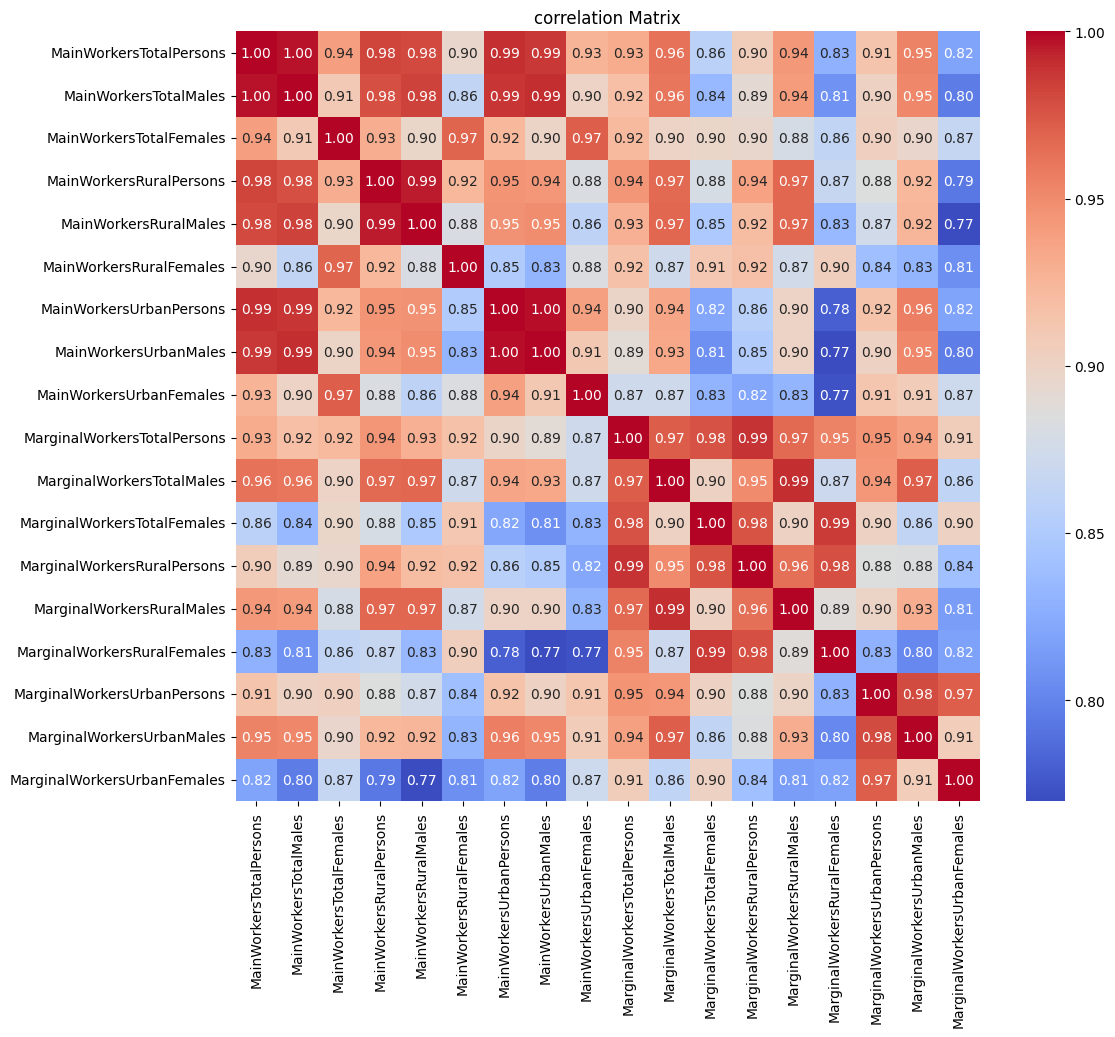

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
def correlation_matrix():
    numberic_df = df.select_dtypes(include=['float64','int64'])
    
    plt.figure(figsize=(12,10))
    sns.heatmap(numberic_df.corr(), annot=True,cmap='coolwarm', fmt='.2f')
    plt.title('correlation Matrix')
    plt.show()
    
correlation_matrix()

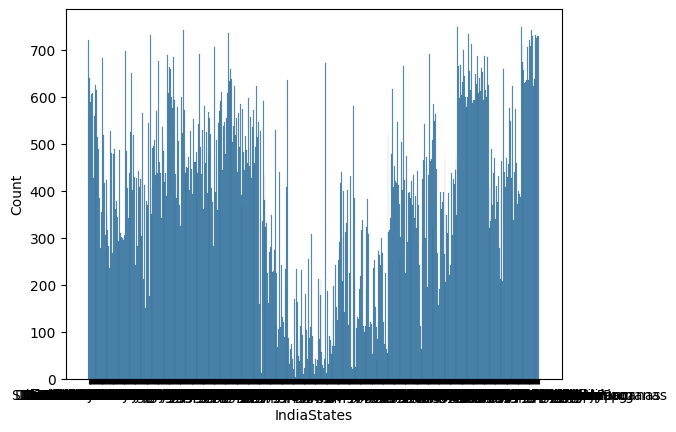

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt   
sns.histplot(x = 'IndiaStates', data = df )
plt.show()

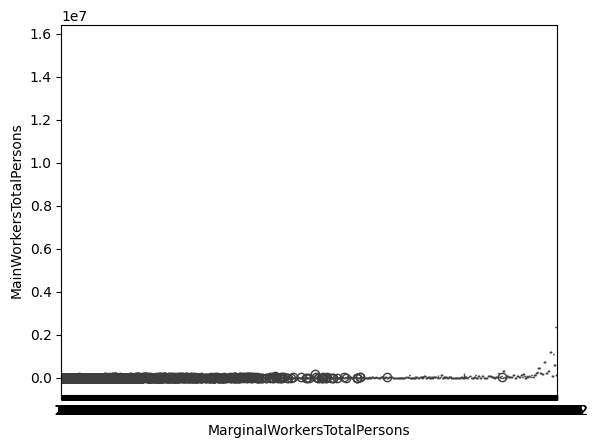

In [42]:
x_var = "MarginalWorkersTotalPersons"
y_var = "MainWorkersTotalPersons"
sns.boxplot(x = x_var, y = y_var, data = df)
plt.show()

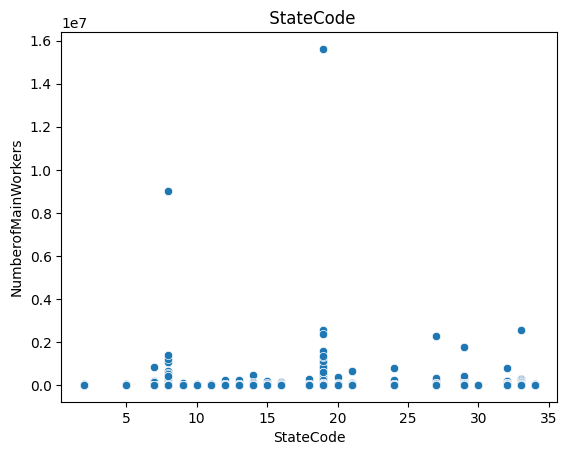

In [43]:
y_var = "MainWorkersTotalPersons".strip()
sns.scatterplot(x = 'StateCode', y = y_var, data = df)
plt.xlabel('StateCode')
plt.ylabel('NumberofMainWorkers')
plt.title(' StateCode')
plt.show()

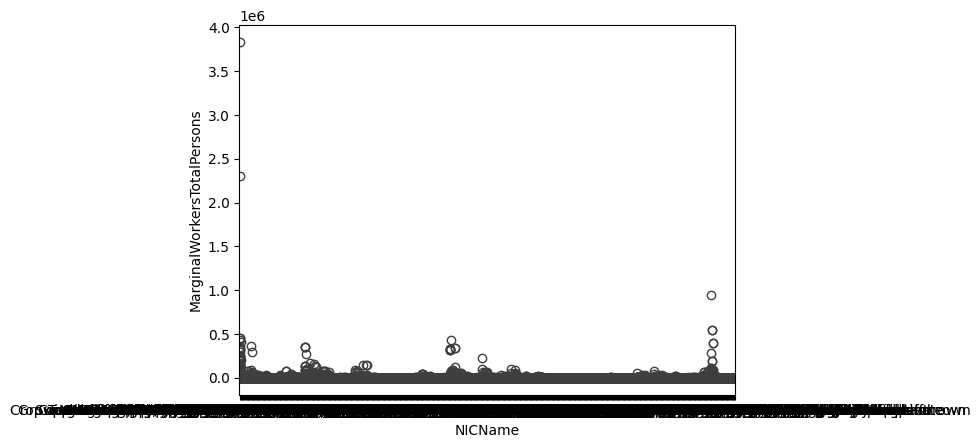

In [44]:
sns.boxplot( x = "NICName", y = 'MarginalWorkersTotalPersons', data = df)
plt.show()

Datas cleaning process

In [46]:
# Drop un neccessary cols
columns_to_drop = ["StateCode", "DistrictCode", "Division", "Group", "Class"]
df = df.drop(columns=columns_to_drop)


In [47]:
df.columns

Index(['IndiaStates', 'NICName', 'MainWorkersTotalPersons',
       'MainWorkersTotalMales', 'MainWorkersTotalFemales',
       'MainWorkersRuralPersons', 'MainWorkersRuralMales',
       'MainWorkersRuralFemales', 'MainWorkersUrbanPersons',
       'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
       'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales',
       'MarginalWorkersTotalFemales', 'MarginalWorkersRuralPersons',
       'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
       'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales',
       'MarginalWorkersUrbanFemales'],
      dtype='object')

In [48]:
# Extract 'State' and 'District' from 'India/States' column
df[['State', 'District']] = df['IndiaStates'].str.extract(r'STATE - (\w+)|District - (\w+)', expand=True)
df = df.drop('IndiaStates', axis=1)

In [49]:
df[['State', 'District']].isnull().sum()

State       180430
District     14715
dtype: int64

In [50]:
# Fill NaN values in 'State' column with forward fill (ffill)
df['State'] = df['State'].ffill()
df['District'] = df['District'].bfill()


In [51]:
df[['State', 'District']].isnull().sum()

State       0
District    0
dtype: int64

Feature Engg

In [52]:
# Example: Creating a new 'TotalWorkers' column by summing 'MainWorkersTotalPersons' and 'MarginalWorkersTotalPersons'
df['TotalWorkers'] = df['MainWorkersTotalPersons'] + df['MarginalWorkersTotalPersons']
df['MaleFemaleRatio'] = df['MainWorkersTotalMales'] / (df['MainWorkersTotalFemales'].replace(0, 1))

In [53]:
df[['TotalWorkers', 'MaleFemaleRatio']].isnull().sum()

TotalWorkers       0
MaleFemaleRatio    0
dtype: int64

In [54]:
df['TotalPopulation'] = df['MainWorkersTotalPersons'] + df['MarginalWorkersTotalPersons']
df['WorkersRatio'] = df['TotalWorkers'] / df['TotalPopulation']


In [55]:
df[['TotalPopulation', 'WorkersRatio']].isnull().sum()

TotalPopulation    0
WorkersRatio       0
dtype: int64

In [56]:
df[['TotalPopulation', 'WorkersRatio']] = df[['TotalPopulation', 'WorkersRatio']].astype(int)

In [57]:
# # download final df
df.to_csv("HRM.csv", index = False)

# Downloading lattitude and longitude of indian states


In [58]:
# Replace 'file_path' with the path to your CSV file
file_path = r"D:/Datascience/DataSet/project 9/long/lat_long.csv"

df_geo = pd.read_csv(file_path)

In [59]:
df_geo.nunique()

Unnamed: 0    33
State.Name    33
latitude      33
longitude     32
dtype: int64

In [60]:
# Drop the specified columns
df_geo = df_geo.drop(['Unnamed: 0', 'State.Name'], axis=1)


In [61]:
# Concatenate the two DataFrames horizontally (along columns) based on their index
df_1 = pd.concat([df, df_geo[['latitude', 'longitude']]], axis=1)

In [62]:
df_1.head()

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District,TotalWorkers,MaleFemaleRatio,TotalPopulation,WorkersRatio,latitude,longitude
0,Total,828980,708129,120851,20567,17425,3142,808413,690704,117709,61009,44743,16266,1969,1494,475,59040,43249,15791,NCT,North,889989,5.859521,889989,1,11.667026,92.735983
1,"Crop and animal production, hunting and relate...",1484,1271,213,179,128,51,1305,1143,162,224,150,74,23,13,10,201,137,64,NCT,North,1708,5.967136,1708,1,14.750429,78.570026
2,Growing of non-perennial crops,169,151,18,17,15,2,152,136,16,92,65,27,14,12,2,78,53,25,NCT,North,261,8.388889,261,1,27.100399,93.616601
3,"Growing of cereals (except rice), leguminous c...",83,81,2,9,7,2,74,74,0,37,27,10,8,6,2,29,21,8,NCT,North,120,40.500000,120,1,26.749981,94.216667
4,Growing of rice,9,9,0,0,0,0,9,9,0,0,0,0,0,0,0,0,0,0,NCT,North,9,9.000000,9,1,25.785414,87.479973


In [63]:
df_1.columns

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude'],
      dtype='object')

In [64]:
df_1[['latitude', 'longitude', ]].isnull().sum()

latitude     195112
longitude    195112
dtype: int64

In [65]:
df_1.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
195140     True
195141    False
195142     True
195143    False
195144     True
Length: 195145, dtype: bool

In [66]:
df_1.columns

Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude'],
      dtype='object')

In [67]:
# Calculate the mean of the 'Latitude' and 'Longitude' columns
mean_latitude = df_1['latitude'].mean()
mean_longitude = df_1['longitude'].mean()

# Fill the missing values with their respective mean values
df_1.loc[:, 'latitude'] = df_1['latitude'].fillna(mean_latitude)
df_1.loc[:, 'longitude'] = df_1['longitude'].fillna(mean_longitude)

In [68]:
df_1[['latitude', 'longitude']].isnull().sum()

latitude     0
longitude    0
dtype: int64

# Outlieres Detection

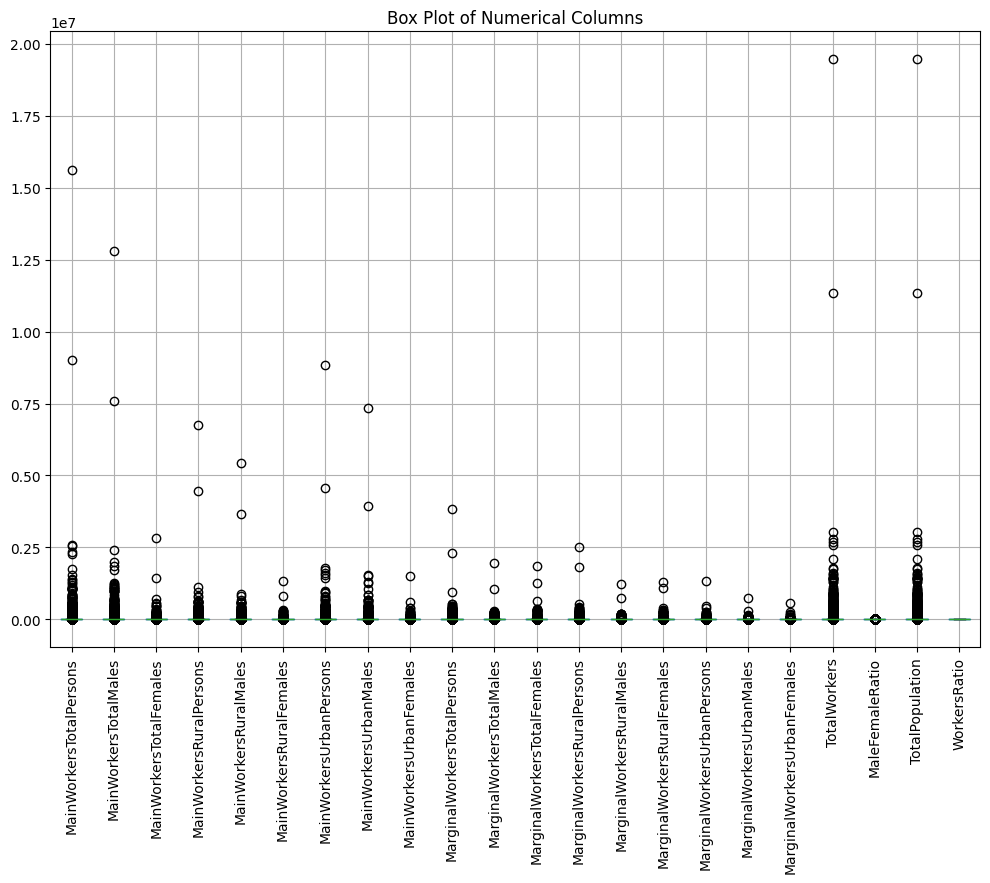

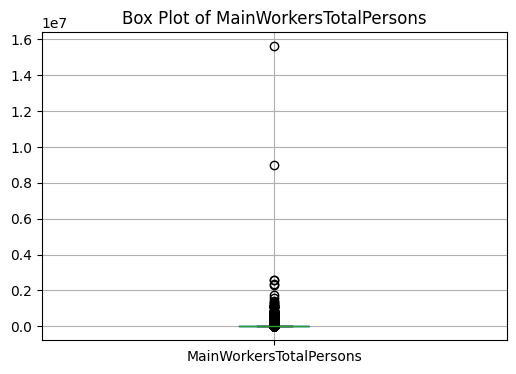

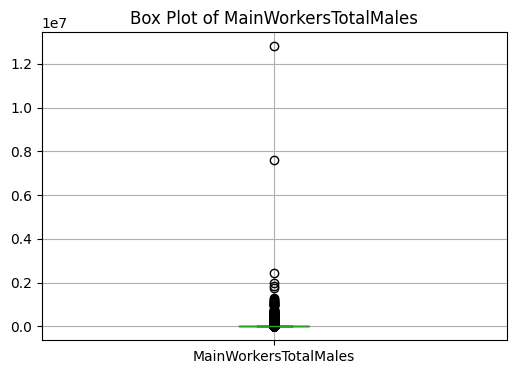

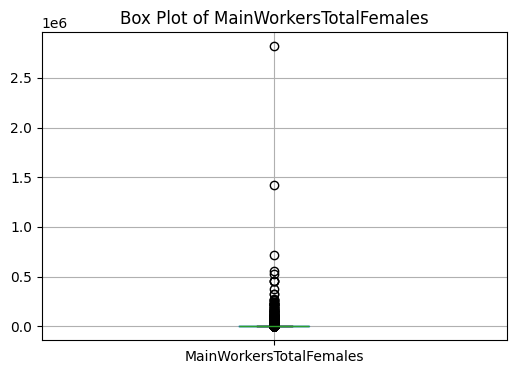

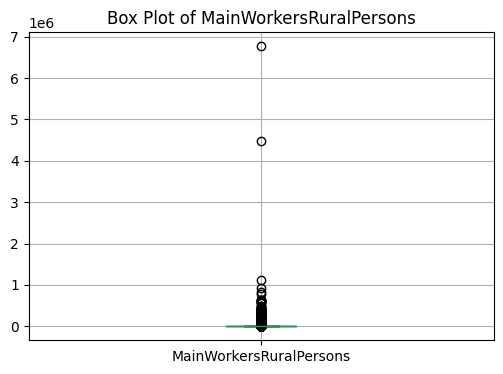

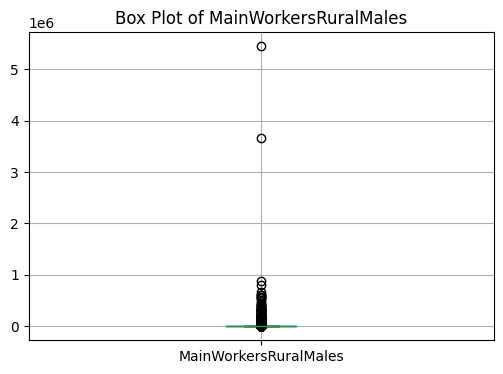

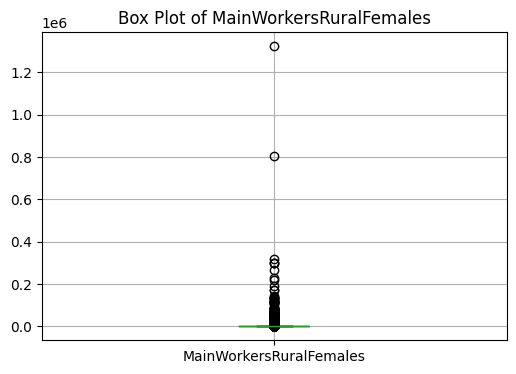

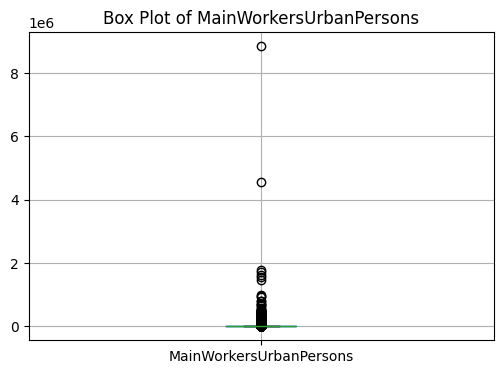

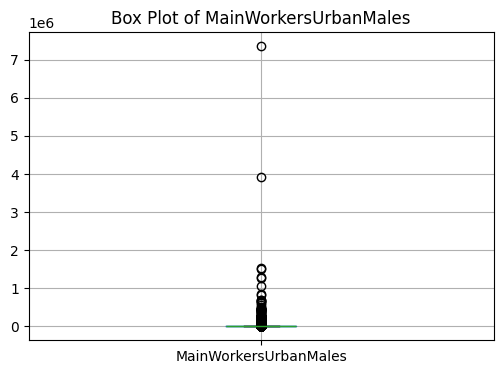

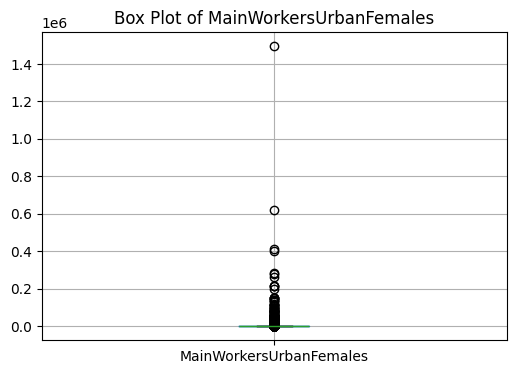

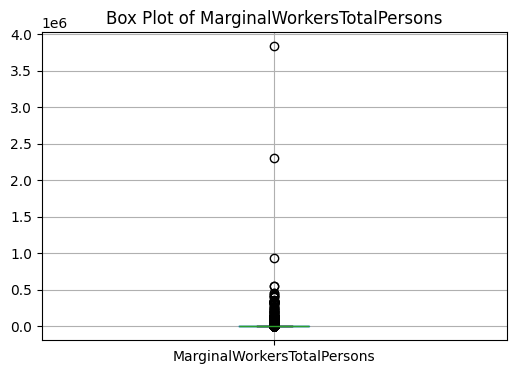

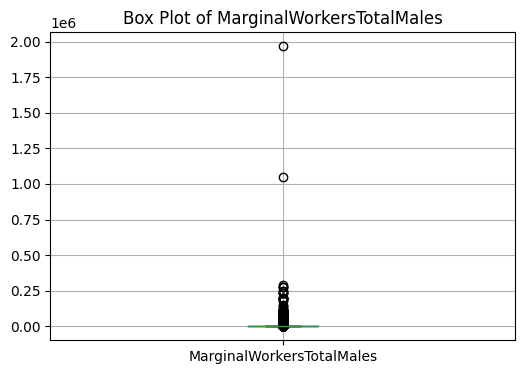

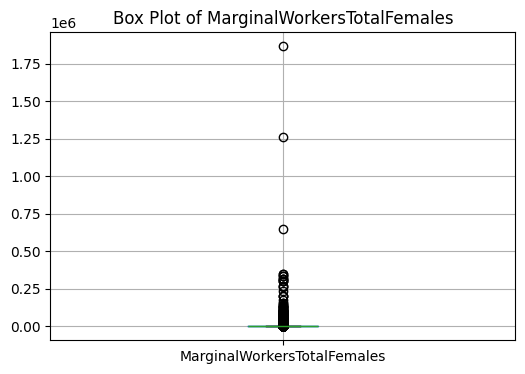

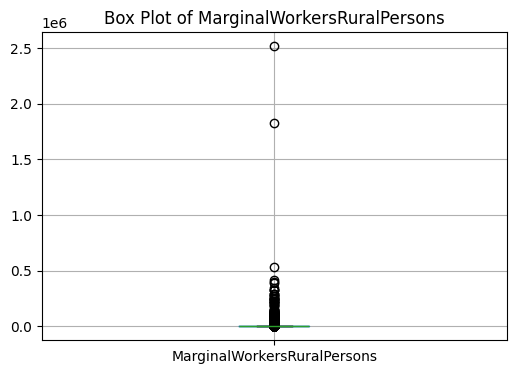

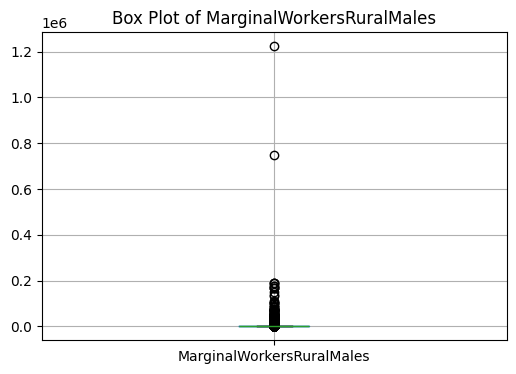

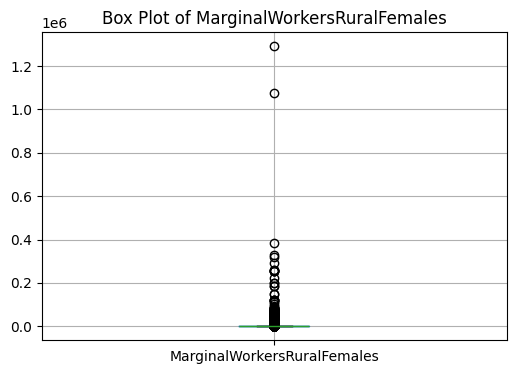

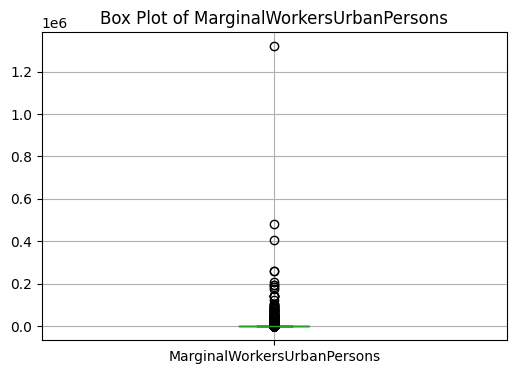

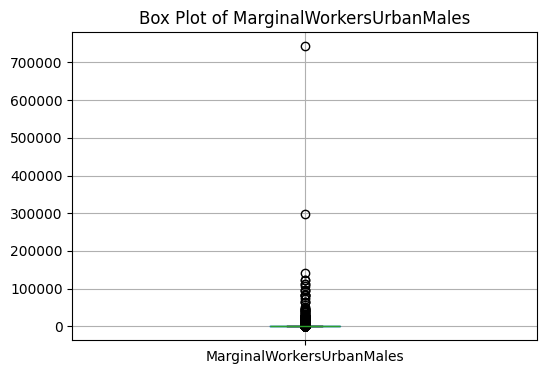

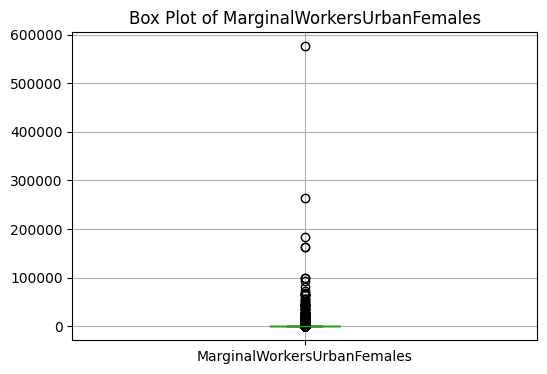

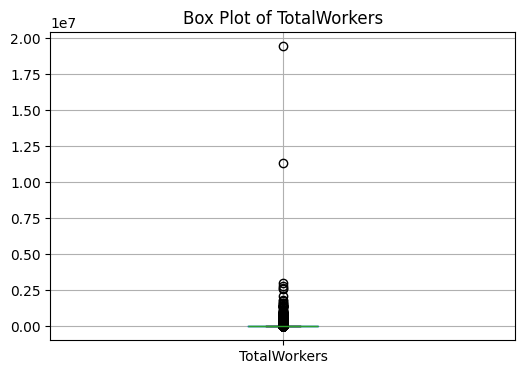

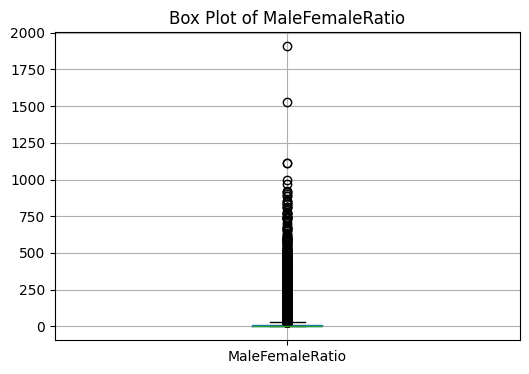

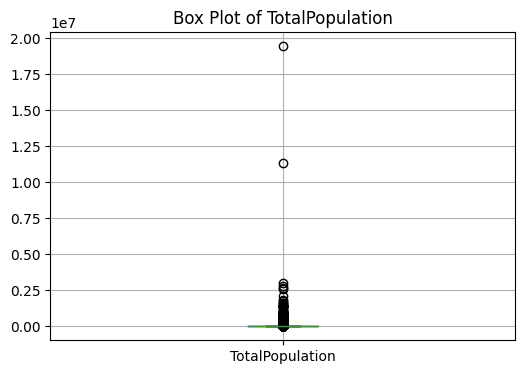

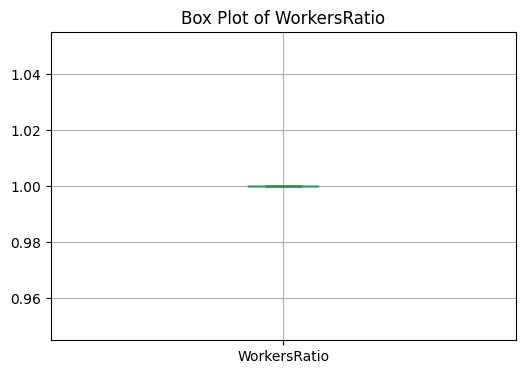

In [69]:
import matplotlib.pyplot as plt
# Select only the numerical columns for outlier detection
numerical_columns = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation', 'WorkersRatio']

# Calculate outliers using Z-score
z_scores =df_1[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Plot Box Plots to visualize the distribution and outliers
plt.figure(figsize=(12, 8))
df_1[numerical_columns].boxplot()
plt.title("Box Plot of Numerical Columns")
plt.xticks(rotation=90)
plt.show()

# Plot Box Plots separately for each numerical column to focus on individual distributions
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    df_1[[column]].boxplot()
    plt.title(f"Box Plot of {column}")
    plt.show()

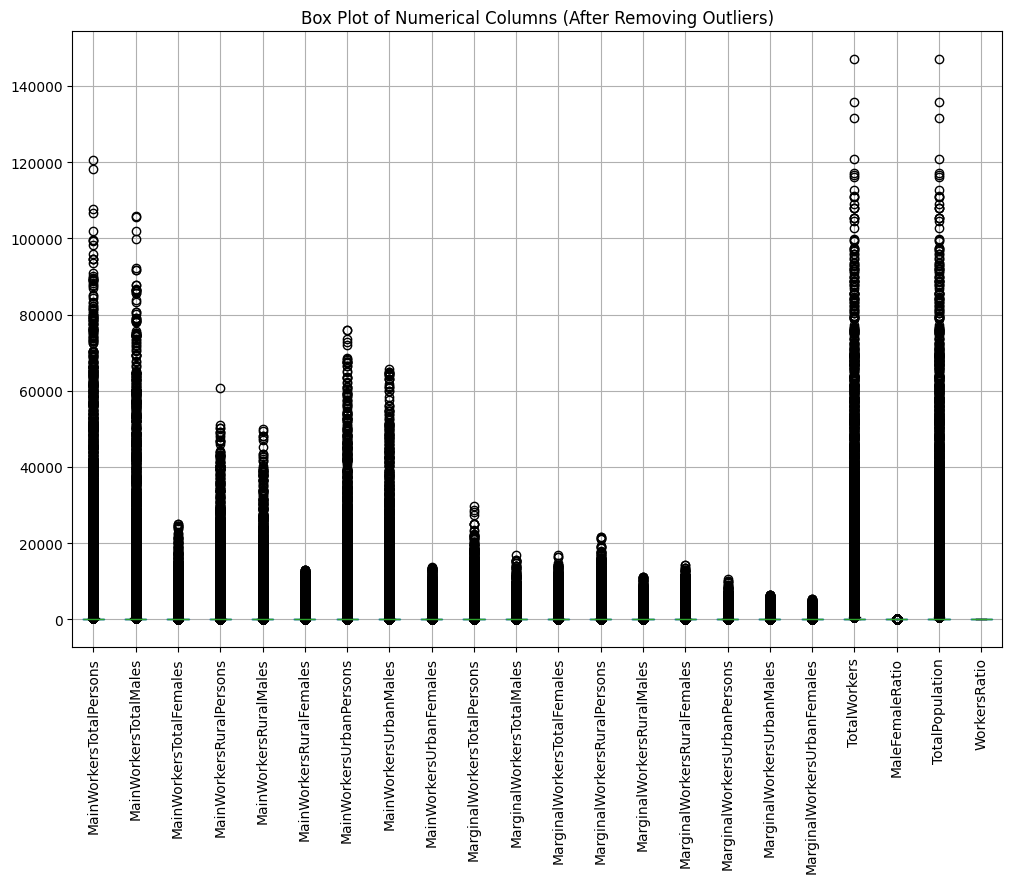

In [70]:
# Remove outliers

# Select only the numerical columns for outlier detection
numerical_columns = ['MainWorkersTotalPersons', 'MainWorkersTotalMales', 'MainWorkersTotalFemales',
                     'MainWorkersRuralPersons', 'MainWorkersRuralMales', 'MainWorkersRuralFemales',
                     'MainWorkersUrbanPersons', 'MainWorkersUrbanMales', 'MainWorkersUrbanFemales',
                     'MarginalWorkersTotalPersons', 'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
                     'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales', 'MarginalWorkersRuralFemales',
                     'MarginalWorkersUrbanPersons', 'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales',
                     'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation', 'WorkersRatio']

# Calculate Z-scores for each numerical column
z_scores = df_1[numerical_columns].apply(lambda x: (x - x.mean()) / x.std())

# Set a threshold for Z-score (e.g., 3) to identify outliers
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)

# Remove rows with outliers in any numerical column
df_1_no_outliers = df_1[~outliers.any(axis=1)]

# Visualize the distribution of cleaned data with Box Plots
plt.figure(figsize=(12, 8))
df_1_no_outliers = df_1[~outliers.any(axis=1)]
df_1_no_outliers[numerical_columns].boxplot()  # Removed the square brackets here
plt.title("Box Plot of Numerical Columns (After Removing Outliers)")
plt.xticks(rotation=90)
plt.show()

In [71]:
df_1.shape

(195145, 27)

In [72]:
df_1['District']

0         North
1         North
2         North
3         North
4         North
          ...  
195140    Purba
195141    Purba
195142    Purba
195143    Purba
195144    Purba
Name: District, Length: 195145, dtype: object

In [73]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195145 entries, 0 to 195144
Data columns (total 27 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   NICName                      195145 non-null  object 
 1   MainWorkersTotalPersons      195145 non-null  int64  
 2   MainWorkersTotalMales        195145 non-null  int64  
 3   MainWorkersTotalFemales      195145 non-null  int64  
 4   MainWorkersRuralPersons      195145 non-null  int64  
 5   MainWorkersRuralMales        195145 non-null  int64  
 6   MainWorkersRuralFemales      195145 non-null  int64  
 7   MainWorkersUrbanPersons      195145 non-null  int64  
 8   MainWorkersUrbanMales        195145 non-null  int64  
 9   MainWorkersUrbanFemales      195145 non-null  int64  
 10  MarginalWorkersTotalPersons  195145 non-null  int64  
 11  MarginalWorkersTotalMales    195145 non-null  int64  
 12  MarginalWorkersTotalFemales  195145 non-null  int64  
 13 

In [74]:
df_1.nunique()

NICName                          587
MainWorkersTotalPersons         8679
MainWorkersTotalMales           7811
MainWorkersTotalFemales         3970
MainWorkersRuralPersons         5767
MainWorkersRuralMales           5218
MainWorkersRuralFemales         2694
MainWorkersUrbanPersons         6561
MainWorkersUrbanMales           5934
MainWorkersUrbanFemales         2929
MarginalWorkersTotalPersons     4208
MarginalWorkersTotalMales       3181
MarginalWorkersTotalFemales     2850
MarginalWorkersRuralPersons     3406
MarginalWorkersRuralMales       2535
MarginalWorkersRuralFemales     2379
MarginalWorkersUrbanPersons     2421
MarginalWorkersUrbanMales       1951
MarginalWorkersUrbanFemales     1557
State                             23
District                         440
TotalWorkers                    9451
MaleFemaleRatio                29974
TotalPopulation                 9451
WorkersRatio                       1
latitude                          34
longitude                         33
d

In [75]:
df_1.to_csv("newdf.csv", index = False)

# NLP

In [107]:
model = pd.read_csv(r"D:/GUVI/Integration python with sql/Combined dataframe.csv")
model

,State Code,District Code,India/States,Division,Group,Class,NIC Name,Main Workers - Total - Persons,Main Workers - Total - Males,Main Workers - Total - Females,Main Workers - Rural - Persons,Main Workers - Rural - Males,Main Workers - Rural - Females,Main Workers - Urban - Persons,Main Workers - Urban - Males,Main Workers - Urban - Females,Marginal Workers - Total - Persons,Marginal Workers - Total - Males,Marginal Workers - Total - Females,Marginal Workers - Rural - Persons,Marginal Workers - Rural - Males,Marginal Workers - Rural - Females,Marginal Workers - Urban - Persons,Marginal Workers - Urban - Males,Marginal Workers - Urban - Females
0,`07,`000,STATE - NCT OF DELHI,`00,`000,`0000,Total,828980,708129,120851,20567,17425,3142,808413,690704,117709,61009,44743,16266,1969,1494,475,59040,43249,15791
1,`07,`000,STATE - NCT OF DELHI,`01,`000,`0000,"Crop and animal production, hunting and relate...",1484,1271,213,179,128,51,1305,1143,162,224,150,74,23,13,10,201,137,64
2,`07,`000,STATE - NCT OF DELHI,`01,`011,`0000,Growing of non-perennial crops,169,151,18,17,15,2,152,136,16,92,65,27,14,12,2,78,53,25
3,`07,`000,STATE - NCT OF DELHI,`01,`011,`0111,"Growing of cereals (except rice), leguminous c...",83,81,2,9,7,2,74,74,0,37,27,10,8,6,2,29,21,8
4,`07,`000,STATE - NCT OF DELHI,`01,`011,`0112,Growing of rice,9,9,0,0,0,0,9,9,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195140,`19,`345,District - Purba Medinipur,`99,`990,`9900,Activities of extraterritorial organizations a...,18,12,6,0,0,0,18,12,6,0,0,0,0,0,0,0,0,0
195141,`19,`345,District - Purba Medinipur,`99,`991,`0000,Blank,8244,5866,2378,5592,4090,1502,2652,1776,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195142,`19,`345,District - Purba Medinipur,`99,`991,`9910,Blank,8244,5866,2378,5592,4090,1502,2652,1776,876,25591,8488,17103,22057,7272,14785,3534,1216,2318
195143,`19,`345,District - Purba Medinipur,`99,`992,`0000,Incomplete description/ Wrongly Classifed,8324,4604,3720,6762,3974,2788,1562,630,932,14872,3352,11520,13204,2934,10270,1668,418,1250


In [108]:
model['India/States'].unique()

array(['STATE - NCT OF DELHI', 'District - North West',
       'District - North', 'District - North East', 'District - East',
       'District - New Delhi', 'District - Central', 'District - West',
       'District - South West', 'District - South', 'STATE - TRIPURA',
       'District - West Tripura', 'District - South Tripura',
       'District - Dhalai', 'District - North Tripura',
       'STATE - JHARKHAND', 'District - Garhwa', 'District - Chatra',
       'District - Kodarma', 'District - Giridih', 'District - Deoghar',
       'District - Godda', 'District - Sahibganj', 'District - Pakur',
       'District - Dhanbad', 'District - Bokaro', 'District - Lohardaga',
       'District - Purbi Singhbhum', 'District - Palamu',
       'District - Latehar', 'District - Hazaribagh',
       'District - Ramgarh', 'District - Dumka', 'District - Jamtara',
       'District - Ranchi', 'District - Khunti', 'District - Gumla',
       'District - Simdega', 'District - Pashchimi Singhbhum',
       'D

In [109]:
# State wise Districts datas 

states_data = {
    'Rajasthan': ['Jalor', 'Sirohi', 'Banswara', 'Ganganagar', 'Ajmer', 'Pali', 'Bikaner', 'Tonk', 'Sikar', 'Kota', 'Jhunjhunun', 
                'Dhaulpur', 'Rajsamand', 'Bhilwara', 'Alwar', 'Chittaurgarh', 'Bundi', 'Hanumangarh', 'Nagaur', 'Udaipur', 'Jhalawar',
                'SawaiMadhopur', 'Baran', 'Jaipur', 'Bharatpur', 'Barmer', 'Karauli', 'Churu', 'Dausa', 'Jaisalmer', 'Dungarpur', 'Jodhpur'],
    'Odisha'   : ['Rayagada', 'Jajapur', 'Anugul', 'Sambalpur', 'Dhenkanal', 'Kalahandi', 'Nuapada', 'Khordha', 'Debagarh', 'Sundargarh',
                'Koraput', 'Kandhamal', 'Kendujhar', 'Mayurbhanj', 'Kendrapara', 'Malkangiri', 'Jagatsinghapur', 'Puri', 'Cuttack', 'Bargarh',
                'Bhadrak', 'Nayagarh', 'Gajapati', 'Baudh', 'Jharsuguda', 'Ganjam', 'Baleshwar', 'Nabarangapur', 'Balangir', 'Subarnapur'],
    'Assam'    : ['Chirang', 'Nalbari', 'Nagaon', 'Sonitpur', 'Goalpara', 'Udalguri', 'Darrang', 'Kamrup', 'Dhubri', 'Dhemaji', 'DimaHasao', 
                'Baksa', 'KarbiAnglong', 'Sivasagar', 'Kokrajhar', 'Tinsukia', 'Golaghat', 'Cachar', 'Dibrugarh', 'KamrupMetropolitan', 'Lakhimpur', 
                'Karimganj', 'Hailakandi', 'Barpeta', 'Morigaon', 'Jorhat', 'Bongaigaon'],
    'Nagaland' : ['Chirang', 'Nalbari', 'Nagaon', 'Sonitpur', 'Goalpara', 'Udalguri', 'Darrang', 'Kamrup', 'Dhubri', 'Dhemaji', 'DimaHasao', 'Baksa',
                'KarbiAnglong', 'Sivasagar', 'Kokrajhar', 'Tinsukia', 'Golaghat', 'Cachar', 'Dibrugarh', 'KamrupMetropolitan', 'Lakhimpur', 'Karimganj',
                'Hailakandi', 'Barpeta', 'Morigaon', 'Jorhat', 'Bongaigaon'],
    'Sikkim'   : ['SouthDistrict', 'EastDistrict', 'NorthDistrict', 'WestDistrict'],
    'Bihar'    : ['Gaya', 'Nalanda', 'Patna', 'Araria', 'Supaul', 'Saran', 'Madhubani', 'Katihar', 'Kishanganj', 'Gopalganj', 'Darbhanga', 'Bhagalpur',
                'Bhojpur', 'Buxar', 'Nawada', 'Muzaffarpur', 'Samastipur', 'Sheohar', 'Purnia', 'Munger', 'Sitamarhi', 'Begusarai', 'Rohtas', 'Jamui', 
                'Banka', 'Saharsa', 'Madhepura', 'Arwal', 'PurbaChamparan', 'Jehanabad', 'Sheikhpura', 'Vaishali', 'Khagaria', 'Lakhisarai', 
                'PashchimChamparan', 'KaimurBhabua', 'Siwan'],
    'Uttar Pradesh': ['Baghpat', 'Mahoba', 'KanpurNagar', 'Jhansi', 'Sultanpur', 'Saharanpur', 'Faizabad', 'Balrampur', 'Budaun', 'Mau', 'Auraiya',
                 'Muzaffarnagar', 'Chandauli', 'Kushinagar', 'Lalitpur', 'Lucknow', 'Shrawasti', 'Kaushambi', 'Allahabad', 'Ballia', 'AmbedkarNagar', 
                 'Mathura', 'Aligarh', 'SantRavidasNagarBhadohi', 'RaeBareli', 'Sonbhadra', 'Ghaziabad', 'Mainpuri', 'Pilibhit', 'Bijnor', 'Bahraich',
                 'Banda', 'Mirzapur', 'Meerut', 'Rampur', 'Chitrakoot', 'KanshiramNagar', 'Etawah', 'Kheri', 'Kannauj', 'Jaunpur', 'Unnao',
                 'GautamBuddhaNagar', 'Hardoi', 'Agra', 'Farrukhabad', 'BaraBanki', 'Siddharthnagar', 'JyotibaPhuleNagar', 'Moradabad', 'Mahrajganj', 
                 'Sitapur', 'Fatehpur', 'Ghazipur', 'Azamgarh', 'Jalaun', 'Gonda', 'Firozabad', 'Varanasi', 'SantKabirNagar', 'MahamayaNagar', 
                 'Bareilly', 'Shahjahanpur', 'Basti', 'Gorakhpur', 'KanpurDehat', 'Deoria', 'Bulandshahr', 'Etah'],
    'Uttarakhand': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar',
                 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Himachal Pradesh': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 
                        'UdhamSinghNagar', 'Garhwal', 'Uttarkashi', 'Champawat'],
    'Puducherry': ['Nainital', 'Pithoragarh', 'Hardwar', 'Chamoli', 'Dehradun', 'Rudraprayag', 'TehriGarhwal', 'Almora', 'Bageshwar', 'UdhamSinghNagar',
                'Garhwal', 'Uttarkashi', 'Champawat'],
    'TamilNadu': ['Thoothukkudi', 'Karur', 'Namakkal', 'Dharmapuri', 'Nagapattinam', 'Thiruvarur', 'Ariyalur', 'Kancheepuram', 'Perambalur', 
                'Madurai', 'Coimbatore', 'Chennai', 'Kanniyakumari', 'Theni', 'Virudhunagar', 'Cuddalore', 'Salem', 'Dindigul', 'Ramanathapuram',
                'Sivaganga', 'Tirunelveli', 'Erode', 'Viluppuram', 'Pudukkottai', 'Thanjavur', 'Thiruvallur', 'Tiruvannamalai', 'Krishnagiri',
                'Tiruppur', 'Vellore', 'Tiruchirappalli', 'TheNilgiris'],
    'Kerala': ['Palakkad', 'Kannur', 'Kozhikode', 'Idukki', 'Thiruvananthapuram', 'Kasaragod', 'Kollam', 'Alappuzha', 'Thrissur', 'Ernakulam',
            'Malappuram', 'Kottayam', 'Wayanad', 'Pathanamthitta'],
    'Goa'   : ['NorthGoa', 'SouthGoa'],
    'Karnataka': ['Kolar', 'DakshinaKannada', 'Yadgir', 'Chamarajanagar', 'Bijapur', 'Mandya', 'Udupi', 'Haveri', 'Davanagere', 'Hassan', 'Bangalore', 
                'Ramanagara', 'Chitradurga', 'Mysore', 'Dharwad', 'Shimoga', 'Koppal', 'Gulbarga', 'Bidar', 'Gadag', 'Kodagu', 'BangaloreRural',
                'UttaraKannada', 'Raichur', 'Bagalkot', 'Belgaum', 'Bellary', 'Chikkaballapura', 'Chikmagalur', 'Tumkur'],
    'Maharashtra': ['Jalna', 'Kolhapur', 'Sindhudurg', 'Raigarh', 'Nanded', 'Washim', 'Gondiya', 'Gadchiroli', 'Dhule', 'Bid', 'Sangli', 'Wardha', 
                    'Pune', 'Nagpur', 'Akola', 'Satara', 'Osmanabad', 'Yavatmal', 'Aurangabad', 'Ratnagiri', 'Parbhani', 'Latur', 'Nandurbar', 'Nashik', 
                    'Mumbai', 'Solapur', 'Jalgaon', 'Ahmadnagar', 'Thane', 'Buldana', 'Amravati', 'Bhandara', 'MumbaiSuburban', 'Hingoli', 'Chandrapur'],
    'Gujarat'   : ['Rajkot', 'Ahmadabad', 'Navsari', 'Kheda', 'Patan', 'Tapi', 'Narmada', 'Porbandar', 'Anand', 'Vadodara', 'Surendranagar', 
                    'Jamnagar', 'Kachchh', 'BanasKantha', 'SabarKantha', 'Dohad', 'TheDangs', 'Gandhinagar', 'Bhavnagar', 'Valsad', 'Amreli', 'Surat',
                    'PanchMahals', 'Junagadh', 'Bharuch', 'Mahesana'],
    'Jharkhand' : ['Giridih', 'Khunti', 'Deoghar', 'Hazaribagh', 'Ramgarh', 'Lohardaga', 'PashchimiSinghbhum', 'Garhwa', 'Godda', 'Chatra', 
                    'PurbiSinghbhum', 'Jamtara', 'Palamu', 'Latehar', 'Dhanbad', 'Sahibganj', 'Bokaro', 'Kodarma', 'SaraikelaKharsawan', 'Dumka', 
                    'Gumla', 'Simdega', 'Ranchi', 'Pakur'],
    'Tripura'   : ['Dhalai', 'WestTripura', 'NorthTripura', 'SouthTripura'],
    'NCT of Delhi': ['Central', 'East', 'NewDelhi', 'North', 'West', 'NorthEast', 'SouthWest', 'South', 'NorthWest'],
    'West Bengal': ['Jalpaiguri', 'Hugli', 'Nadia', 'Haora', 'PaschimMedinipur', 'Kolkata', 'UttarDinajpur', 'Bankura', 'Murshidabad',
                     'NorthTwentyFourParganas', 'KochBihar', 'SouthTwentyFourParganas', 'PurbaMedinipur', 'Maldah', 'Darjiling', 'Puruliya', 
                     'Birbhum', 'DakshinDinajpur', 'Barddhaman'],
    'Mizoram': ['Saiha', 'Aizawl', 'Kolasib', 'Mamit', 'Lunglei', 'Champhai', 'Lawngtlai', 'Serchhip'],
    'Manipur': ['ImphalEast', 'Ukhrul', 'Bishnupur', 'Senapati', 'ImphalWest', 'Chandel', 'Tamenglong', 'Churachandpur', 'Thoubal'],
    'Arunachal Pradesh': ['UpperSubansiri', 'DibangValley', 'Tirap', 'Anjaw', 'PapumPare', 'LowerDibangValley', 'WestSiang', 'Tawang', 'WestKameng',
                         'LowerSubansiri', 'KurungKumey', 'EastKameng', 'EastSiang', 'Lohit', 'Changlang', 'UpperSiang']
}


In [110]:
import re
district_list  = ['District - Ganganagar',
       'District - Hanumangarh', 'District - Bikaner', 'District - Churu',
       'District - Jhunjhunun', 'District - Alwar',
       'District - Bharatpur', 'District - Dhaulpur',
       'District - Karauli', 'District - Sawai Madhopur',
       'District - Dausa', 'District - Jaipur', 'District - Sikar',
       'District - Nagaur', 'District - Jodhpur', 'District - Jaisalmer',
       'District - Barmer', 'District - Jalor', 'District - Sirohi',
       'District - Pali', 'District - Ajmer', 'District - Tonk',
       'District - Bundi', 'District - Bhilwara', 'District - Rajsamand',
       'District - Dungarpur', 'District - Banswara',
       'District - Chittaurgarh', 'District - Kota', 'District - Baran',
       'District - Jhalawar', 'District - Udaipur',
       'District - Pratapgarh']
unique_districts = list(set([re.sub(r'[^a-zA-Z0-9]', '', district.split(" - ")[1]) for district in district_list]))

# Print the result without quotes
print(', '.join(unique_districts))

Banswara, Bikaner, Nagaur, Dhaulpur, Jhunjhunun, Jhalawar, Karauli, Chittaurgarh, Kota, Sikar, Jaisalmer, Hanumangarh, Sirohi, Pratapgarh, Udaipur, Bhilwara, Bundi, Ganganagar, Rajsamand, Barmer, Alwar, Churu, Tonk, Dausa, Bharatpur, Jodhpur, SawaiMadhopur, Jalor, Baran, Pali, Ajmer, Dungarpur, Jaipur


In [112]:
new_st = pd.read_csv(r"D:/Datascience/DataSet/final_Industrial_HR_Dataset.csv")
new_st.head(5)

,NICName,MainWorkersTotalPersons,MainWorkersTotalMales,MainWorkersTotalFemales,MainWorkersRuralPersons,MainWorkersRuralMales,MainWorkersRuralFemales,MainWorkersUrbanPersons,MainWorkersUrbanMales,MainWorkersUrbanFemales,MarginalWorkersTotalPersons,MarginalWorkersTotalMales,MarginalWorkersTotalFemales,MarginalWorkersRuralPersons,MarginalWorkersRuralMales,MarginalWorkersRuralFemales,MarginalWorkersUrbanPersons,MarginalWorkersUrbanMales,MarginalWorkersUrbanFemales,State,District,TotalWorkers,MaleFemaleRatio,TotalPopulation,WorkersRatio,latitude,longitude,NICName_str,sentiment_score
0,['total'],828980,708129,120851,20567,17425,3142,808413,690704,117709,61009,44743,16266,1969,1494,475,59040,43249,15791,NCT,North,889989,5.859521,889989,1,11.667026,92.735983,total,0.0000
1,"['crop', 'animal', 'production', 'hunting', 'r...",1484,1271,213,179,128,51,1305,1143,162,224,150,74,23,13,10,201,137,64,NCT,North,1708,5.967136,1708,1,14.750429,78.570026,crop animal production hunting related service...,0.0000
2,"['growing', 'nonperennial', 'crops']",169,151,18,17,15,2,152,136,16,92,65,27,14,12,2,78,53,25,NCT,North,261,8.388889,261,1,27.100399,93.616601,growing nonperennial crops,0.1779
3,"['growing', 'cereals', 'except', 'rice', 'legu...",83,81,2,9,7,2,74,74,0,37,27,10,8,6,2,29,21,8,NCT,North,120,40.500000,120,1,26.749981,94.216667,growing cereals except rice leguminous crops o...,0.1779
4,"['growing', 'rice']",9,9,0,0,0,0,9,9,0,0,0,0,0,0,0,0,0,0,NCT,North,9,9.000000,9,1,25.785414,87.479973,growing rice,0.1779


In [113]:
new_st.columns.unique

<bound method Index.unique of Index(['NICName', 'MainWorkersTotalPersons', 'MainWorkersTotalMales',
       'MainWorkersTotalFemales', 'MainWorkersRuralPersons',
       'MainWorkersRuralMales', 'MainWorkersRuralFemales',
       'MainWorkersUrbanPersons', 'MainWorkersUrbanMales',
       'MainWorkersUrbanFemales', 'MarginalWorkersTotalPersons',
       'MarginalWorkersTotalMales', 'MarginalWorkersTotalFemales',
       'MarginalWorkersRuralPersons', 'MarginalWorkersRuralMales',
       'MarginalWorkersRuralFemales', 'MarginalWorkersUrbanPersons',
       'MarginalWorkersUrbanMales', 'MarginalWorkersUrbanFemales', 'State',
       'District', 'TotalWorkers', 'MaleFemaleRatio', 'TotalPopulation',
       'WorkersRatio', 'latitude', 'longitude', 'NICName_str',
       'sentiment_score'],
      dtype='object')>

In [114]:
unique_states = new_st['State'].unique()
unique_states

array(['NCT', 'TRIPURA', 'JHARKHAND', 'GUJARAT', 'MAHARASHTRA',
       'KARNATAKA', 'GOA', 'KERALA', 'TAMIL', 'PUDUCHERRY', 'HIMACHAL',
       'UTTARAKHAND', 'UTTAR', 'BIHAR', 'SIKKIM', 'NAGALAND', 'ASSAM',
       'ODISHA', 'RAJASTHAN', 'ARUNACHAL', 'MANIPUR', 'MIZORAM', 'WEST'],
      dtype=object)